# Homework 4: logistic regression

### PA Women in Tech: Intro to Data Science with Python

In this homework you will look at creating a **logistic regression model**. You will:
* define your input variables
* visualise your data
* create a logistic regression model
* evaluate your model
* create a confusion matrix
* explore how a model could be improved

Make sure your data file is located in the same folder as this Jupyter Notebook file (or you will have to provide the full path for the file location).

## Dataset description

In this homework, we will be working with the MNIST dataset - a classic machine learning dataset. This is a huge dataset containing 70,000, 28 x 28 images of handwritten digits from 0 to 9.

Each row in the dataset represents an image, which is in a 28 x 28 pixel format. There is a column representing each pixel, with an integer that refers to its colour. There is also a 'label' column, indicating the actual number represented in the image.

The dataset is already split into training (60,000 images) and test (10,000 images) sets.

We are going to use logistic regression for image recognition and to classify these digits into their correct classes.

Firstly, the necessary packages are imported (make sure you run the cell):

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

1. Load the `mnist_train.csv` and `mnist_test.csv` files into two dataframes, and print out the first five rows of each

In [ ]:
df_train = pd.read_csv("mnist_train.csv")
df_train.head()

In [ ]:
df_test = pd.read_csv("mnist_test.csv")
df_test.head()

## Explore the data and define input and output variables

2a. Display the shape of both the test and train dataframes

In [ ]:
df_train.shape

In [ ]:
df_test.shape

That is an extremely large number of columns! This is because each row represents an image, which is in a 28x28 pixel format. Each column in a row therefore represents a single pixel. That means there are 28 x 28 = 784 columns holding the image data!

We now want to split our pre-divided train and test data into their X and y components.

The output (y) column in the dataset is the `label` column. The inputs (X) are all other columns, which represent the image.

2b. Create four variables, `X_train`, `X_test`, `y_train` and `y_test` from your test and train dataframes.

Hint: to drop a column from a dataframe, you can use the [`.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [ ]:
X_train = df_train.drop(columns=['label'])
X_test = df_test.drop(columns=['label'])

y_train = df_train['label']
y_test = df_test['label']

Let's now see if we can try and have a look at some of the images. We'll try and view the first five rows (images).

To do this, we can loop through the first five rows of the X train dataframe using Python _slicing_ (`X_train[0:5]`) and the dataframe `.iterrows()` method, which also gives us access to each iteration's _index_. For each iteration/image, we create a new [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

To actually display the image, we have to _reshape_ the data in each row, from a 1x784 dimension array to a 28x28 array. We can do this using the NumPy [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) method. To use this method, we have to pass a NumPy ndarray type (covered in week 1). To get the ndarray for each row (Series) in the dataframe, we use the `.values` attribute.

We can then use the Matplotlib [`.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) method to display data as an image. The `cmap` argument sets the 'colour map' for the image.

In [ ]:
plt.figure(figsize=(20, 4)) # Sets up our plot and defines the size

for index, image in X_train[0:5].iterrows():
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image.values, (28, 28)), cmap=plt.cm.gray)

## Training the model

3a. Create the Linear Regression model object

In [ ]:
lr = LogisticRegression()

3b. Fit your training data to the model (don't worry if a warning message comes up)

In [ ]:
lr.fit(X_train, y_train)

3c. Get the y predictions of your model for the X testing data, storing them in a variable called `predictions`

In [ ]:
predictions = lr.predict(X_test)

## Evaluating the model

Let's have a look at the first prediction made.

4a. Print out the first value of `predictions`

In [ ]:
predictions[0]

To get the first row of the X test data to plot as an image, we can do the following:

In [ ]:
first_image_array = X_test.values[0]

4b. Plot the first row of the X test data as an image

Hint: refer back to the earlier image plotting code shown to help

In [ ]:
plt.imshow(np.reshape(first_image_array, (28, 28)), cmap=plt.cm.gray)

Pretty cool! Our algorithm can correctly read handwritten numbers. Now how good is it overall?

4c. Print out the model score

In [ ]:
print(lr.score(X_test, y_test))

What does the above figure mean? This part is extremely important in any machine learning model development process. As you have seen, actually training an algorithm in Python is not very hard - just one line of code. Really, the hard parts are:

1. Cleaning and transforming your data to fit the algorithm you want to use, and choosing the right algorithm to fit your data/problem type. Most data doesn't arrive as pre-packaged as MNIST (this dataset) does.

2. Evaluating how successful your algorithm will be in the real world i.e. how well does it generalise

The above metric is the accuracy - the percentage of correctly classified images. So ~93% sounds pretty good?! Let's look a bit closer.

4d. Plot a confusion matrix for the predictions and y test data

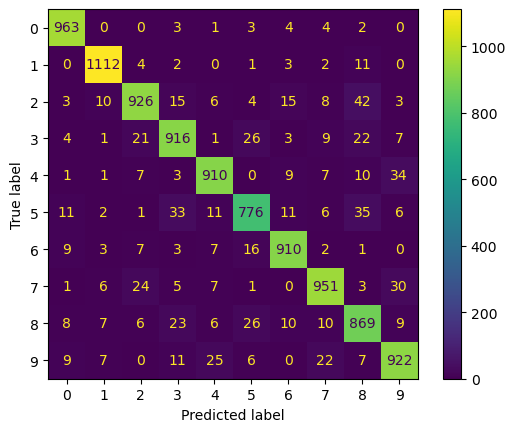

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

The confusion matrix shows us the correctly classified images on the diagonal - the lighter the colour, the higher the number of correctly classified images. It looks like our model is particularly successful with '1' but struggles with '5' and '8' which are deeper shades of green.

4e. Visualise the first five images which were incorrectly classified

Hint: you can filter out rows of a dataframe using square brackets with a boolean condition in - e.g. `X_test[predictions != y_test]`

Hint: the index of each filtered dataframe row is _not_ 1 to 5; you'll need to keep track of the iteration number via a separate variable to use in the `.subplot()` method

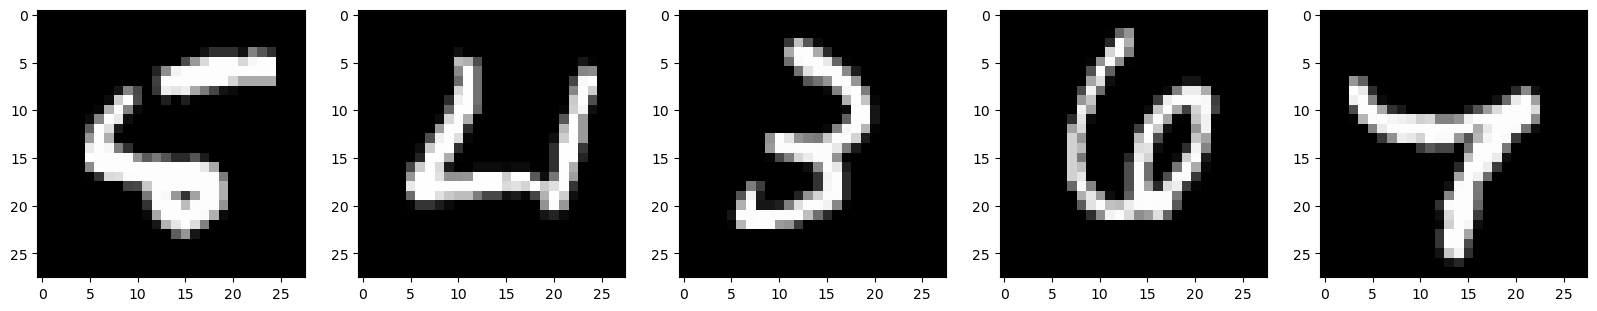

In [55]:
plt.figure(figsize=(20, 4)) # Sets up our plot and defines the size

i = 1
for index, image in X_test[predictions != y_test][0:5].iterrows():
    plt.subplot(1, 5, i)
    i += 1
    plt.imshow(np.reshape(image.values, (28, 28)), cmap=plt.cm.gray)

Would you have gotten these wrong? Some seem quite obvious, although others are trickier to make out!

4f. Print the actual values of the images plotted above

In [59]:
X_test[predictions != y_test][0:5]

8      5
33     4
63     3
66     6
124    7
Name: label, dtype: int64

Clearly our machine learning model is not yet at human level capability and is still getting ~7% of these images wrong on average. Now, imagine having to present this to your client for automatically reading national insurance numbers, or cheques, or medical reports...

## Extension: improving the model

There are a number of _hyperparameters_ to the Logistic Regression model that you can change to affect how it performs. A hyperparameter is a parameter whose value is used to control the learning process. These are values that behind the scenes are affecting how `sklearn` fits your model. Almost all ML models have hyperparameters and you need a good understanding of how the model works to know how to optimise them.

Please refer to the documentation for a full list of the parameters you can change: [sklearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

We will consider a few different hyperparameters.


### Penalty

The _penalty_ adds a term to your error function (which is the difference between your predicted value and the actual value). For example, instead of taking each error as-is, you could square it. This term penalises complex models and has the effect of smoothing out the model. It does this by forcing the model to minimise the size of its coefficients. Watch this video to learn more about how these coefficients work in Logistic Regression, as we didn't go into the mathematical detail in the session: [Logistic Regression Details Pt1: Coefficients](https://www.youtube.com/watch?v=vN5cNN2-HWE)

The penalty options are:

* `none` - no penalty is applied

* `l1` - the sum of the absolute coefficients

* `l2` - the sum of the squares of the coefficients - this is the default, if the penalty isn't specified

* `elasticnet` - adds both `l1` and `l2`

To set the penalty on your Logistic Regression model you can use the keyword argument `penalty`:

In [ ]:
lr_test = LogisticRegression(penalty='none', max_iter=1000)

In [ ]:
lr_test.fit(X_train, y_train)

In [ ]:
predictions = lr_test.predict(X_test)

In [ ]:
print(lr_test.score(X_test, y_test))

### Solvers

How does a supervised machine learning algorithm actually learn? As you learned in week 3, when you fit a model to the data you have some error when you are predicting the values. You want to minimise this error to get the best fitting and predicting model and there are different error metrics you can use to do this with.

This raises a question: how do we know how to alter the parameters of our model in a way that reduces the error? We could choose random values for our parameters until we get a better error score but this isn't a very efficient approach.

Most machine learning algorithms leverage a method called Gradient Descent to minimise the error, which we also briefly covered in week 3. The algorithm finds the resulting error for all the possible parameter values. This creates a very large set of error values which need to be searched to find the minimum error.

There are different ways the algorithm can search this error data to find the minimum value; the different 'solvers' in Logistic Regression are the variations of the Gradient Descent algorithm. Try different ones to see which one works best or is fastest.

You can choose from the below options (for some solvers you can only use certain penalty choices, these are listed):

* `newton-cg` - [`l2`, `none`]
* `lbfgs` - [`l2`, `none`] - this is the default
* `liblinear` - [`l1`, `l2`]
* `sag` - [`l2`, `none`]
* `saga` - [`none`, `l1`, `l2`, `elasticnet`]

To set the solver on your Logistic Regression model you can use the keyword argument `solver`:

In [61]:
LogisticRegression(solver="newton-cg")

LogisticRegression(solver='newton-cg')

### Maximum iterations

When the solver is trying to find the minimum error, it iterates over the values. The maximum number of iterations is defaulted at 100, but we can set this value ourselves.

To set the maximum number of iterations on your Logistic Regression model you can use the keyword argument `max_iter`:

In [62]:
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

Good luck improving your model and seeing if you can increase the accuracy score!

You'll notice that some of the adjustments you make to your model may cause it to become very slow when fitting the data.
If you want to track the time taken to train your model using the various hyperparameters, Python's `time` module may come in handy:

In [50]:
import time

start = time.time()
# do something
end = time.time()
print(f"Time taken: {end - start} seconds")

Time taken: 2.6941299438476562e-05 seconds
